### Customer Profiling

This activity is meant to give you practice exploring data including the use of visualizations with `matplotlib`, `seaborn`, and `plotly`.  The dataset contains demographic information on the customers, information on customer purchases, engagement of customers with promotions, and information on where customer purchases happened.  A complete data dictionary can be found below.  

Your task is to explore the data and use visualizations to inform answers to specific questions using the data.  The questions and resulting visualization should be posted in the group discussion related to this activity.  Some example problems/questions to explore could be:

-----

- Does income differentiate customers who purchase wine? 
- What customers are more likely to participate in the last promotional campaign?
- Are customers with children more likely to purchase products online?
- Do married people purchase more wine?
- What kinds of purchases led to customer complaints?

-----

### Data Dictionary

Attributes


```
ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if customer complained in the last 2 years, 0 otherwise


MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years
Promotion


AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


NumWebPurchases: Number of purchases made through the company’s web site
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s web site in the last month
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('try-it_4.1_starter/data/marketing_campaign.csv',sep = '\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Does income differentiate customers who purchase wine?
### Scatter Plots

Text(0, 0.5, 'Wine purchase')

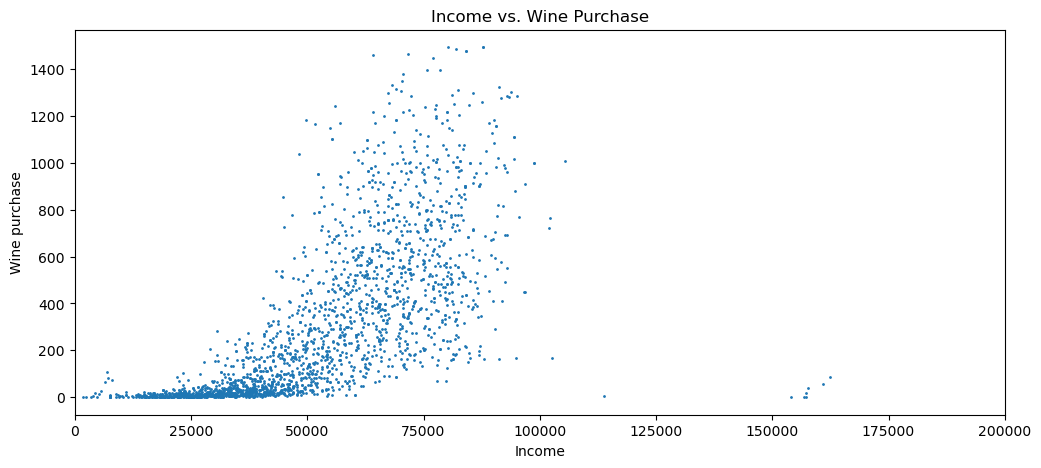

In [5]:
plt.figure(figsize = (12,5))
plt.title('Income vs. Wine Purchase')
plt.scatter(df['Income'],df['MntWines'], s = 1)
plt.xlim(0,200000)
plt.xlabel('Income')
plt.ylabel('Wine purchase')
#plt.xscale('log')

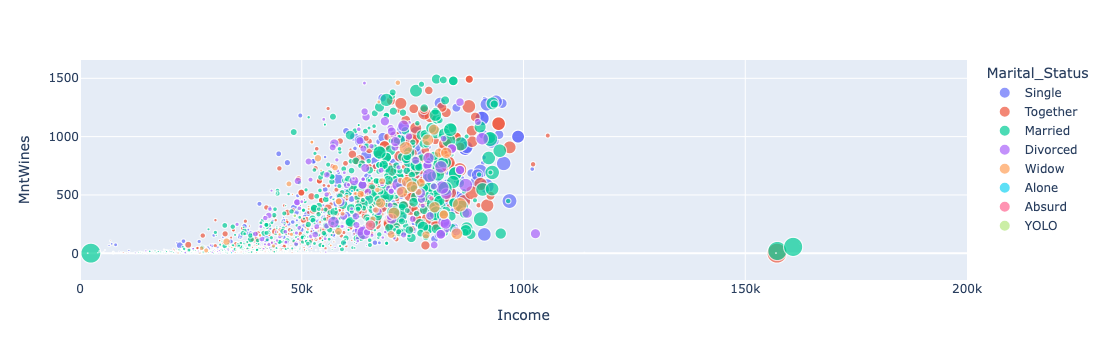

In [6]:
px.scatter(df, x = 'Income', y = 'MntWines', color = 'Marital_Status', size = 'MntMeatProducts', range_x = [0,200000])

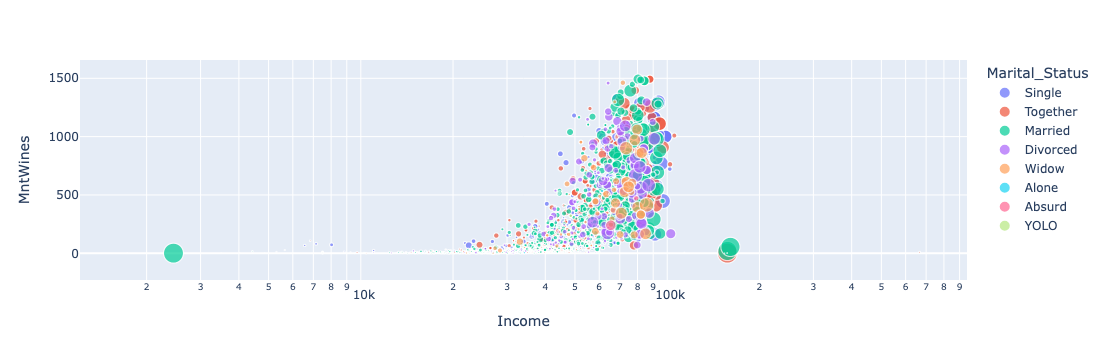

In [7]:
px.scatter(df, x = 'Income', y = 'MntWines', color = 'Marital_Status', size = 'MntMeatProducts', log_x = True)

(0.0, 200000.0)

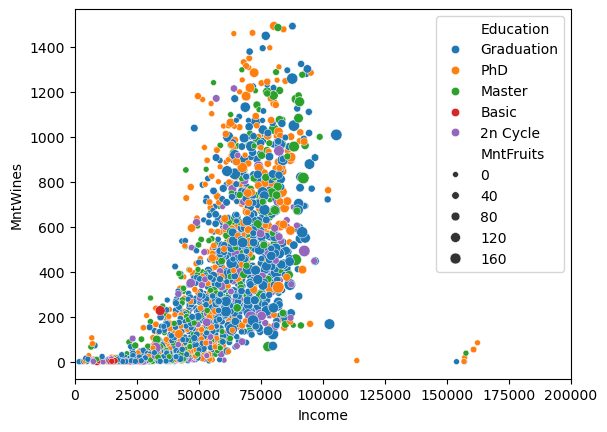

In [8]:
sns.scatterplot(df, x = 'Income', y = 'MntWines', hue = 'Education', size = 'MntFruits')
plt.xlim(0,200000)

(0.0, 200000.0)

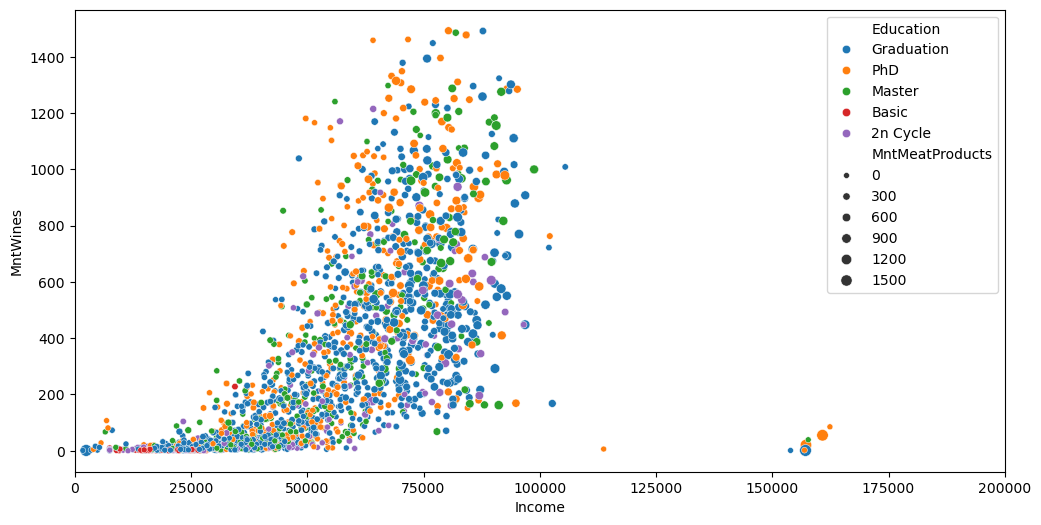

In [9]:
fig,ax = plt.subplots(figsize = (12,6))
sns.scatterplot(df, x = 'Income', y = 'MntWines', hue = 'Education', size = 'MntMeatProducts', ax = ax)
plt.xlim(0,200000)

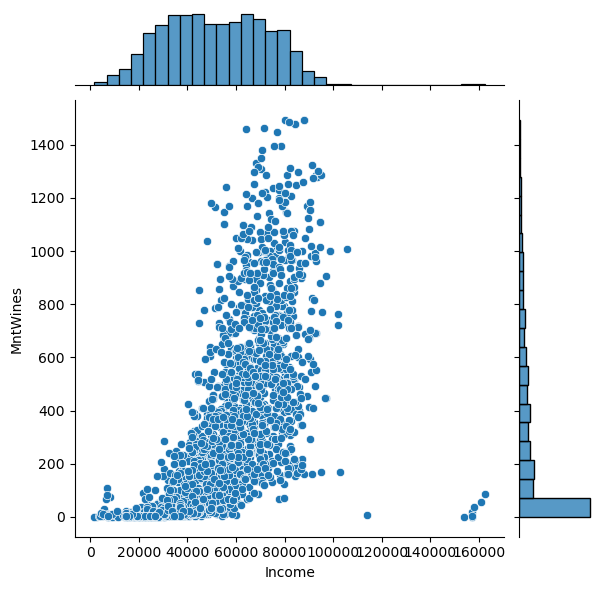

In [10]:
sns.jointplot(data=df.query("Income < 200000"), x="Income", y="MntWines")

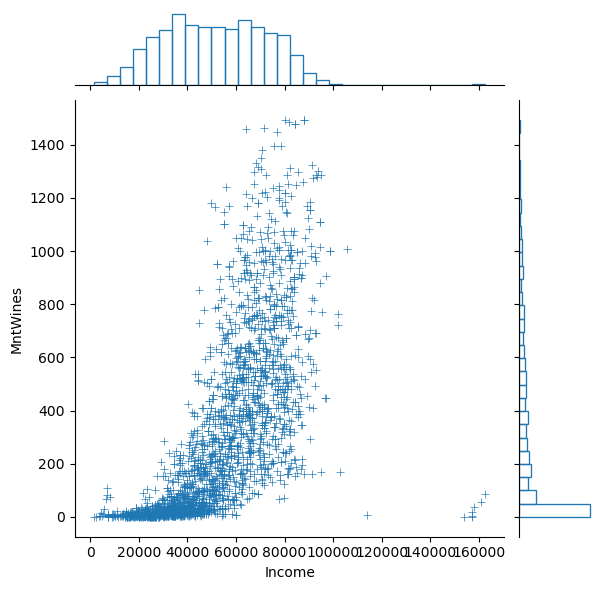

In [11]:
sns.jointplot(data=df.query("Income < 200000"), x="Income", y="MntWines",
              kind="scatter", marker = "+", marginal_kws= {"bins":30,  "edgecolor":"orange", "fill":False}) # edgecolor and fill only apply one

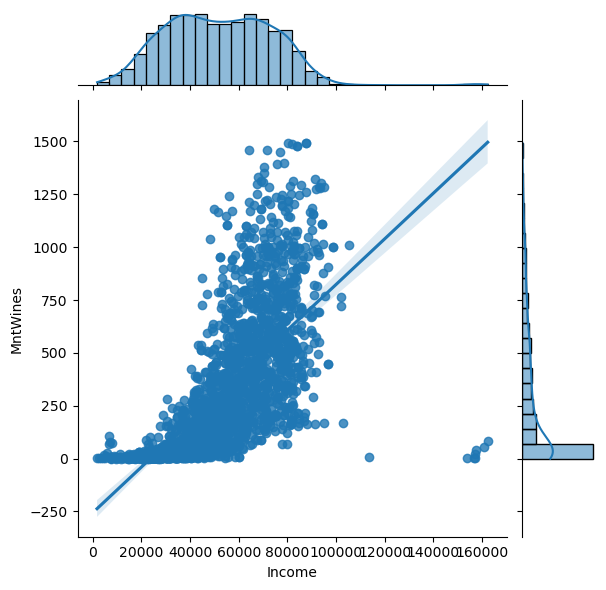

In [12]:
# for reg plot, the only pair margin is kde
sns.jointplot(data=df.query("Income < 200000"), x="Income", y="MntWines",
              kind="reg")

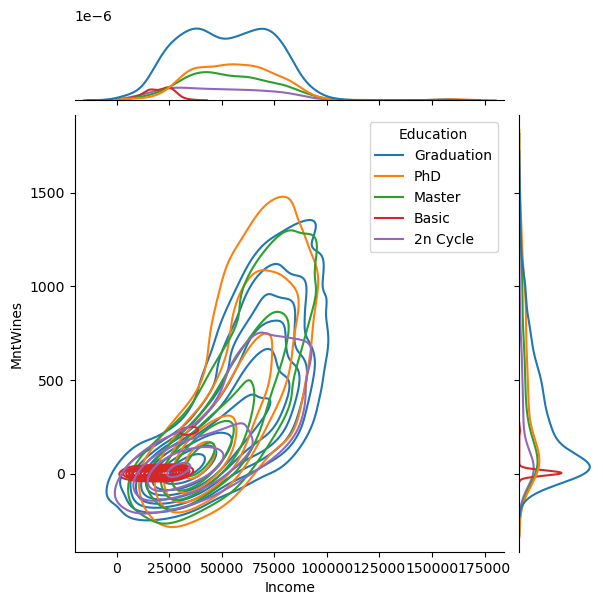

In [13]:
# for kde kind plot, the default is kde margin plot
sns.jointplot(data=df.query("Income < 200000"), x="Income", y="MntWines",
              kind="kde", hue = 'Education')

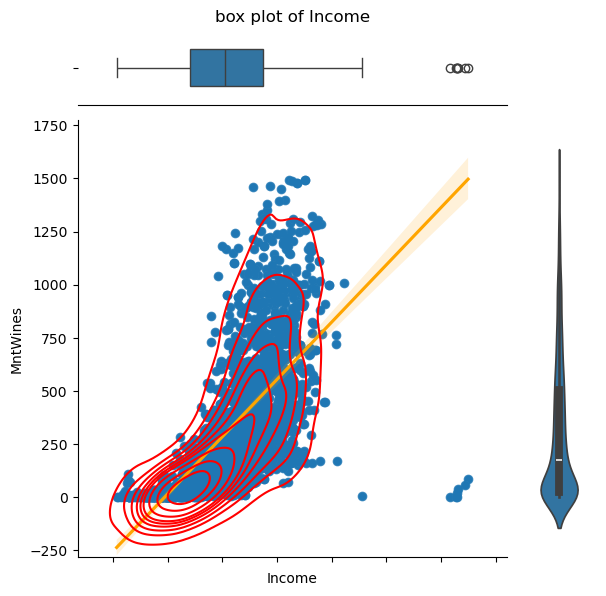

In [14]:
# plot the main frame
graph = sns.jointplot(data=df.query("Income < 200000"), x="Income", y="MntWines")
graph.plot_joint(sns.regplot, line_kws = {"color":"orange"})
graph.plot_joint(sns.kdeplot, color="red")

# if you want to change the
graph.ax_marg_x.clear()
graph.ax_marg_x.set_title("box plot of Income")
sns.boxplot(data=df.query("Income < 200000"), x="Income", ax= graph.ax_marg_x, width=.5)
graph.ax_marg_y.clear()
sns.violinplot(data=df.query("Income < 200000"), y="MntWines", ax= graph.ax_marg_y, width= .5)
graph.ax_marg_y.title.set_position((2,-1))
graph.ax_marg_x.tick_params(bottom=False)
graph.ax_marg_x.set_xticklabels([])
graph.ax_marg_x.set_xlabel("")
graph.ax_marg_y.set_axis_off()


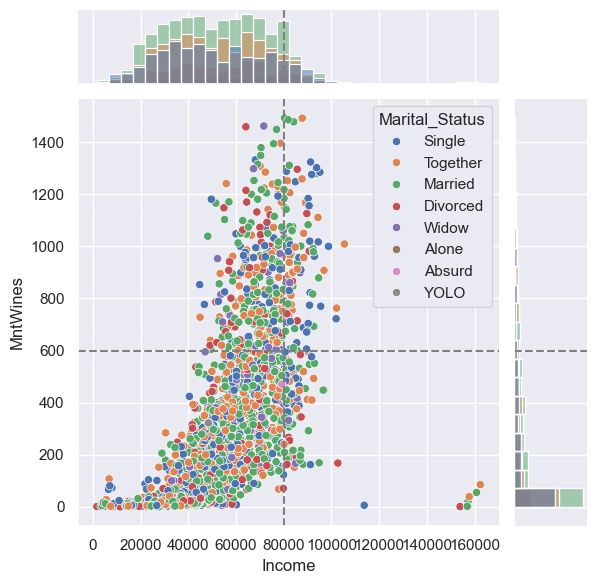

In [15]:
sns.set(style="darkgrid")
grid = sns.JointGrid(data=df.query("Income < 200000"), x="Income", y="MntWines", hue = "Marital_Status")
grid.plot(sns.scatterplot, sns.histplot)
grid.refline(x=80000, y = 600)

<Axes: xlabel='Density', ylabel='MntWines'>

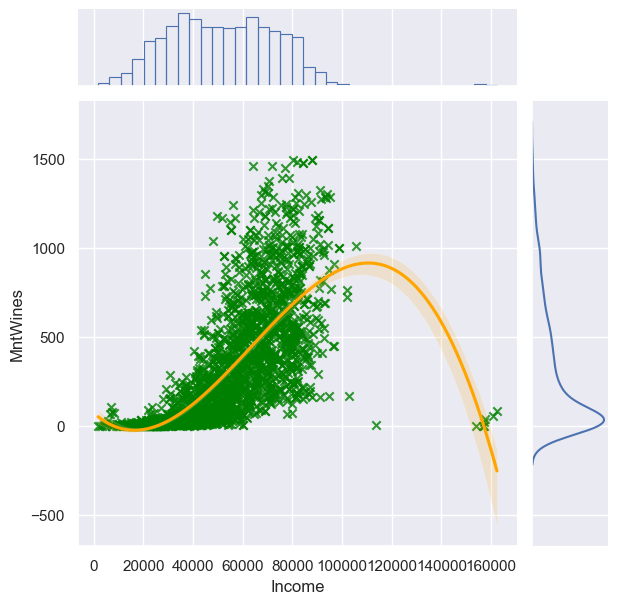

In [16]:
# in order to customize 3 plots: 1. set sns.JointGrid() 2. make the regular sns plots, but set ax = grid.ax_joint,
# ax = grid.ax_marg_x, ax = grid.ax_marg_y

grid = sns.JointGrid() # must be empty

sns.regplot( data=df.query("Income < 200000"), x="Income", y="MntWines",ax= grid.ax_joint, order=3, marker="x", 
            color="green", line_kws={"color": "orange"})
sns.histplot(data=df.query("Income < 200000"), x="Income", ax=grid.ax_marg_x, fill=False, bins = 35)
sns.kdeplot(data=df.query("Income < 200000"), y="MntWines", ax= grid.ax_marg_y) # must have the same y value otherwise the mainframe will chnge

What kinds of purchases led to customer complaints?

### dfwine cut() and groupby() 

In [17]:
dfwine = df[["ID", "Income", "MntWines"]]
dfwine.head(2)

,ID,Income,MntWines
0,5524,58138.0,635
1,2174,46344.0,11


<Axes: xlabel='Income', ylabel='MntWines'>

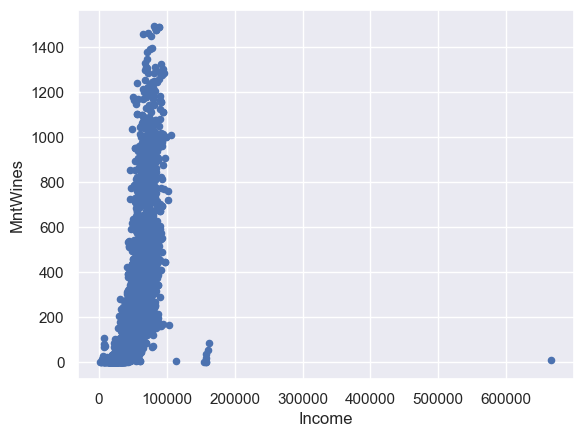

In [18]:
dfwine.plot(kind = "scatter", x= "Income", y = "MntWines")

In [19]:
pd.cut(dfwine["Income"], bins = 5)

0       (1065.064, 134717.2]
1       (1065.064, 134717.2]
2       (1065.064, 134717.2]
3       (1065.064, 134717.2]
4       (1065.064, 134717.2]
                ...         
2235    (1065.064, 134717.2]
2236    (1065.064, 134717.2]
2237    (1065.064, 134717.2]
2238    (1065.064, 134717.2]
2239    (1065.064, 134717.2]
Name: Income, Length: 2240, dtype: category
Categories (5, interval[float64, right]): [(1065.064, 134717.2] < (134717.2, 267704.4] < (267704.4, 400691.6] < (400691.6, 533678.8] < (533678.8, 666666.0]]

In [23]:
#dfwine.drop(columns=["cat"], inplace = True)
dfwine.loc[:, "cat"] = pd.cut(dfwine["Income"], bins = [1730, 20000, 50000, 100000, 200000, 666666],
                              labels= ["lowest", "normal", "middle", "high", "extream"])
dfwine.head()

/var/folders/s9/ml6qrgdx03zdn76qyj8422mh0000gn/T/ipykernel_1111/723486327.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Income,MntWines,cat
0,5524,58138.0,635,middle
1,2174,46344.0,11,normal
2,4141,71613.0,426,middle
3,6182,26646.0,11,normal
4,5324,58293.0,173,middle


In [24]:
dfwine.groupby("cat").agg({"MntWines": ["sum", "mean"], "Income": ["mean", "count"]})

/var/folders/s9/ml6qrgdx03zdn76qyj8422mh0000gn/T/ipykernel_1111/2065964173.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



MntWines                     Income      
             sum        mean           mean count
cat                                              
lowest      1219    9.674603   14455.785714   126
normal     70485   75.546624   35961.067524   933
middle    601498  526.244969   68334.392826  1143
high        2871  239.250000  136016.416667    12
extream        9    9.000000  666666.000000     1

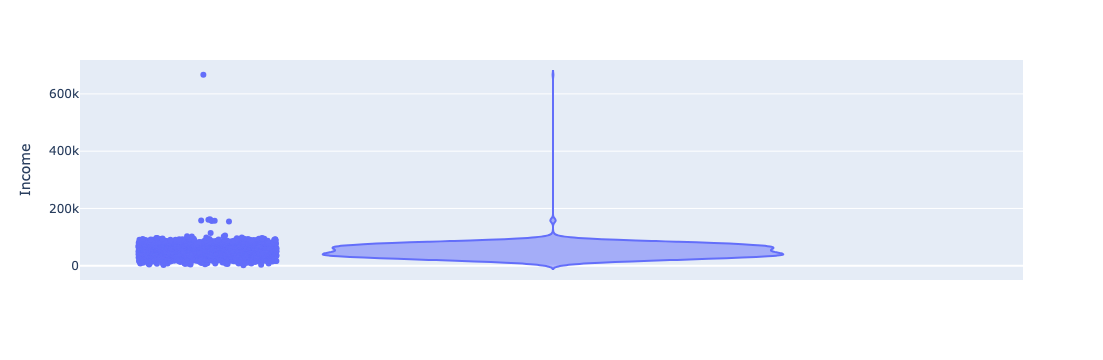

In [25]:
px.violin(dfwine, y = 'Income', points = 'all')

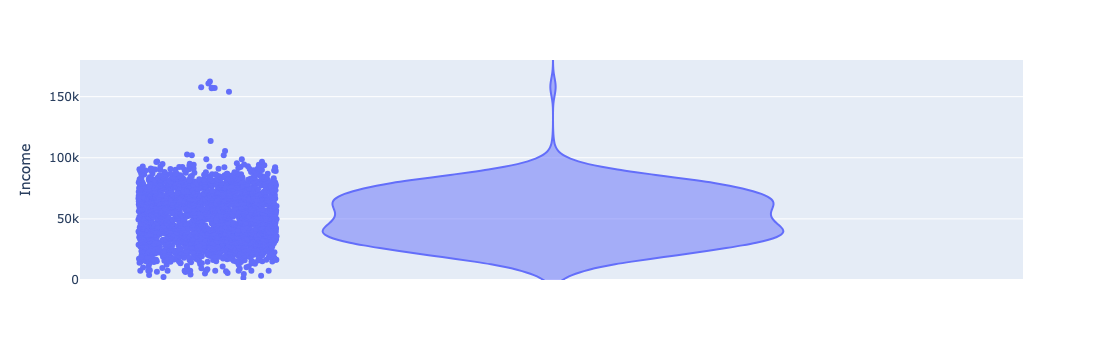

In [26]:
anything = px.violin(dfwine, y = 'Income', points = 'all')
anything.update_layout(yaxis_range=[0, 180000])

<Axes: ylabel='Frequency'>

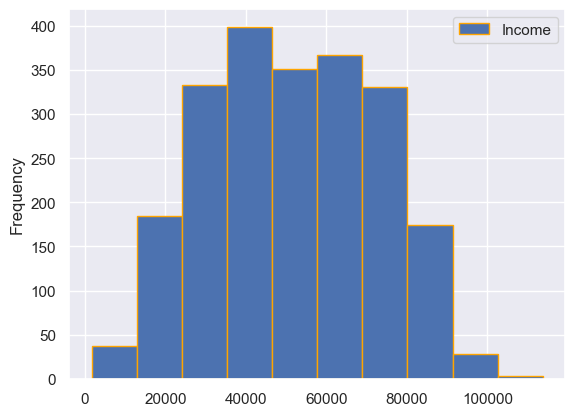

In [27]:
dfwine.query("Income < 120000")\
      .plot(kind="hist", y="Income", edgecolor="orange")

In [28]:
dfwine.drop(columns=["cat"], inplace = True)
dfwine.loc[:, "cat"] = pd.cut(dfwine["Income"], bins = [1730, 30000, 60000, 90000, 666666],
                              labels= ["lowest", "normal", "middle", "high"])
dfwine.head()

/var/folders/s9/ml6qrgdx03zdn76qyj8422mh0000gn/T/ipykernel_1111/615202782.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/s9/ml6qrgdx03zdn76qyj8422mh0000gn/T/ipykernel_1111/615202782.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Income,MntWines,cat
0,5524,58138.0,635,normal
1,2174,46344.0,11,normal
2,4141,71613.0,426,middle
3,6182,26646.0,11,lowest
4,5324,58293.0,173,normal


In [29]:
dfcat = dfwine.groupby("cat").agg({"MntWines": ["sum", "mean"], "Income": ["mean", "count"]})
dfcat.head()

/var/folders/s9/ml6qrgdx03zdn76qyj8422mh0000gn/T/ipykernel_1111/4113857813.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



MntWines                     Income      
            sum        mean           mean count
cat                                             
lowest     5098   13.815718   21530.691057   369
normal   171564  170.710448   44523.815920  1005
middle   462286  586.657360   72425.275381   788
high      37134  700.641509  113505.698113    53

In [30]:
dfcat.columns = ['_'.join(col) for col in dfcat.columns]
dfcat.head()

,MntWines_sum,MntWines_mean,Income_mean,Income_count
cat,,,,
lowest,5098,13.815718,21530.691057,369
normal,171564,170.710448,44523.815920,1005
middle,462286,586.657360,72425.275381,788
high,37134,700.641509,113505.698113,53


<Axes: xlabel='cat'>

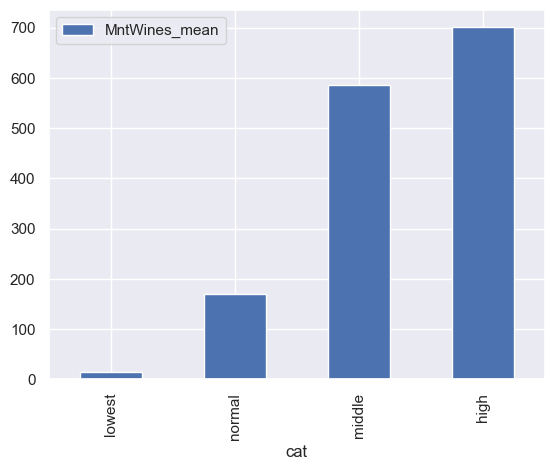

In [31]:
dfcat[['MntWines_mean']].plot.bar()

<BarContainer object of 4 artists>

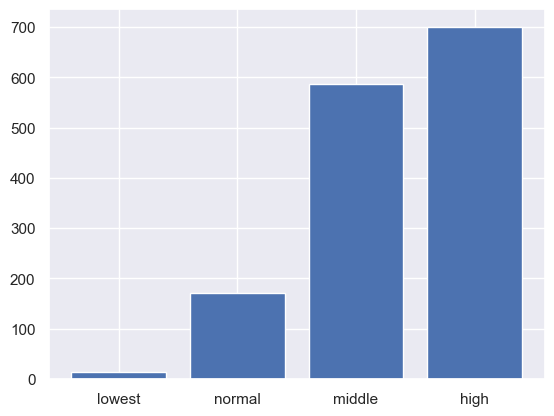

In [32]:
plt.bar(x = dfcat['MntWines_mean'].index, height = dfcat['MntWines_mean'].values)

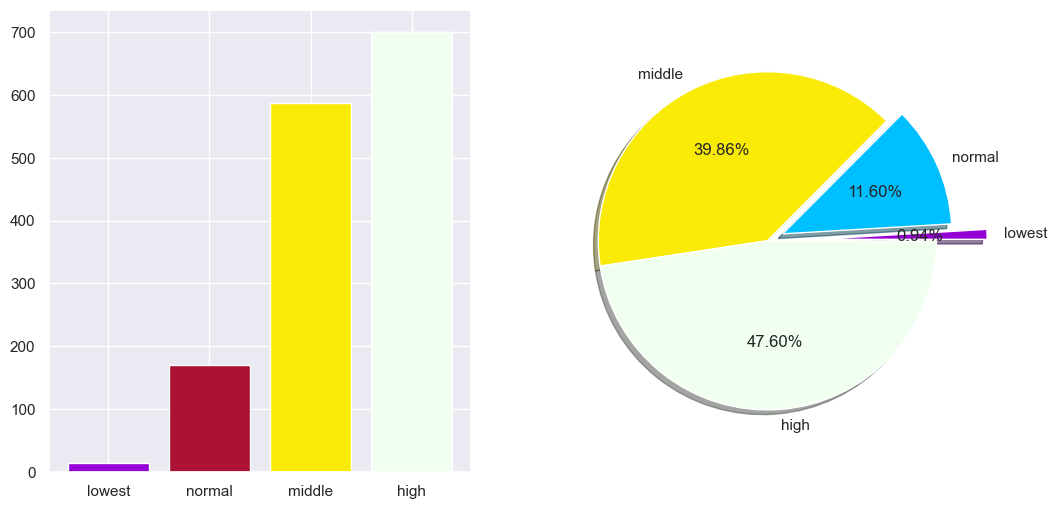

In [33]:
fig,ax = plt.subplots(1,2, figsize = (12,6))
ax[0].bar(x = dfcat['MntWines_mean'].index, height = dfcat['MntWines_mean'].values, color = ['#9400D3', "#AB1234", "#FAEB07", "#F0FFF0"])
ax[1].pie(dfcat['MntWines_mean'], labels = dfcat['MntWines_mean'].index, autopct = "%.2f%%", explode = [0.3,0.1,0,0], shadow = True, 
         colors = ['#9400D3', "#00BFFF", "#FAEB07", "#F0FFF0"])
plt.show()

### Customers with high income purchase more wine than those with low income. The data analysis results indicated the positive correlation between income and wine purchase


### What customers are more likely to participate in the last promotional campaign?

In [34]:
dfprom = df[df['Response']>0]
dfprom.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
15,2114,1946,PhD,Single,82800.0,0,0,24-11-2012,23,1006,...,3,0,0,1,1,0,0,3,11,1
33,7373,1952,PhD,Divorced,46610.0,0,2,29-10-2012,8,96,...,6,0,0,0,0,0,0,3,11,1
39,2968,1943,PhD,Divorced,48948.0,0,0,01-02-2013,53,437,...,6,1,0,0,0,0,0,3,11,1


In [36]:
dfprom2 = df.groupby(['Response','Marital_Status']).count(numeric_only = True)
dfprom2.head()

TypeError: GroupBy.count() got an unexpected keyword argument 'numeric_only'

In [37]:
dfprom3 = df[['Response','Marital_Status', 'Education','Income','Kidhome','Teenhome']]
dfprom3.head()

,Response,Marital_Status,Education,Income,Kidhome,Teenhome
0,1,Single,Graduation,58138.0,0,0
1,0,Single,Graduation,46344.0,1,1
2,0,Together,Graduation,71613.0,0,0
3,0,Together,Graduation,26646.0,1,0
4,0,Married,PhD,58293.0,1,0


In [38]:
dfprom4 = dfprom3.groupby('Marital_Status').agg({'Income':'count'})
dfprom4

,Income
Marital_Status,
Absurd,2
Alone,3
Divorced,232
Married,857
Single,471
Together,573
Widow,76
YOLO,2


<Axes: xlabel='Marital_Status'>

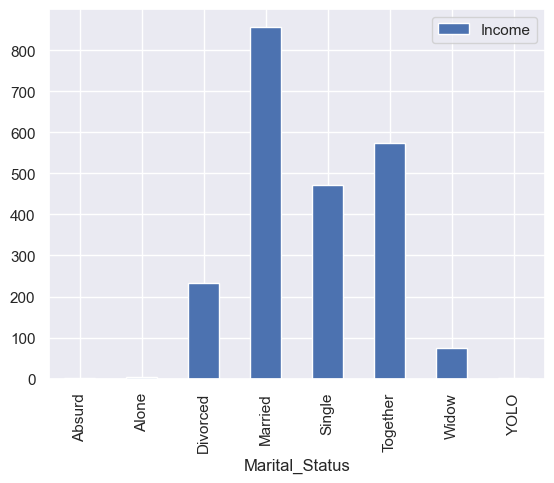

In [39]:
dfprom4[['Income']].plot.bar()

In [40]:
dfprom5 = dfprom3[dfprom3['Response']>0].groupby('Marital_Status').agg({'Income':'count'})
dfprom5

,Income
Marital_Status,
Absurd,1
Alone,1
Divorced,48
Married,98
Single,106
Together,60
Widow,18
YOLO,1


In [41]:
dfmerge = pd.merge(dfprom4,dfprom5, on = 'Marital_Status')
dfmerge

,Income_x,Income_y
Marital_Status,,
Absurd,2,1
Alone,3,1
Divorced,232,48
Married,857,98
Single,471,106
Together,573,60
Widow,76,18
YOLO,2,1


In [42]:
dfmerge['ratio'] = dfmerge['Income_y']/dfmerge['Income_x']
dfmerge

,Income_x,Income_y,ratio
Marital_Status,,,
Absurd,2,1,0.500000
Alone,3,1,0.333333
Divorced,232,48,0.206897
Married,857,98,0.114352
Single,471,106,0.225053
Together,573,60,0.104712
Widow,76,18,0.236842
YOLO,2,1,0.500000


<Axes: xlabel='Marital_Status'>

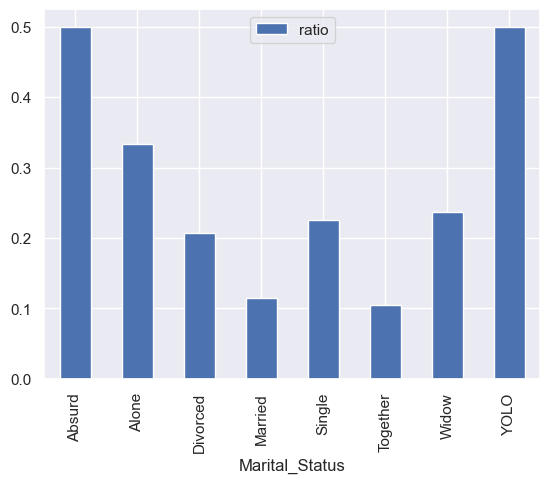

In [43]:
dfmerge[['ratio']].plot.bar()

<Axes: xlabel='Marital_Status'>

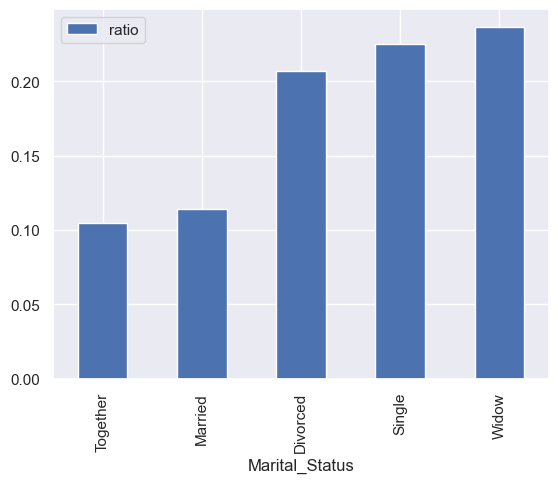

In [44]:
# The count number for marital groups 'Absurd','Alone', and 'YOLO' are too small to get statistic results, so they are deleted
dfmerge[['ratio']].iloc[2:-1].sort_values('ratio').plot.bar()

### Widow, single and divorced customers are more likely to participate the last promotional compaign.

### Are customers with children more likely to purchase products online?

## Box Plots

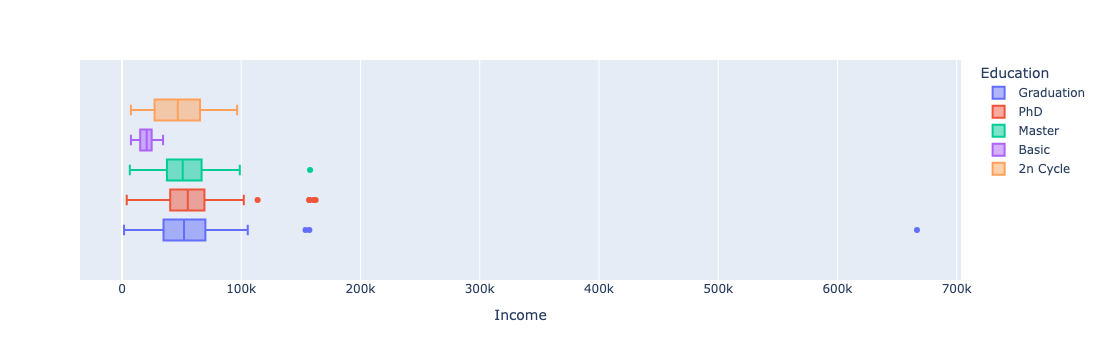

In [45]:
px.box(df, x = 'Income', color = 'Education')

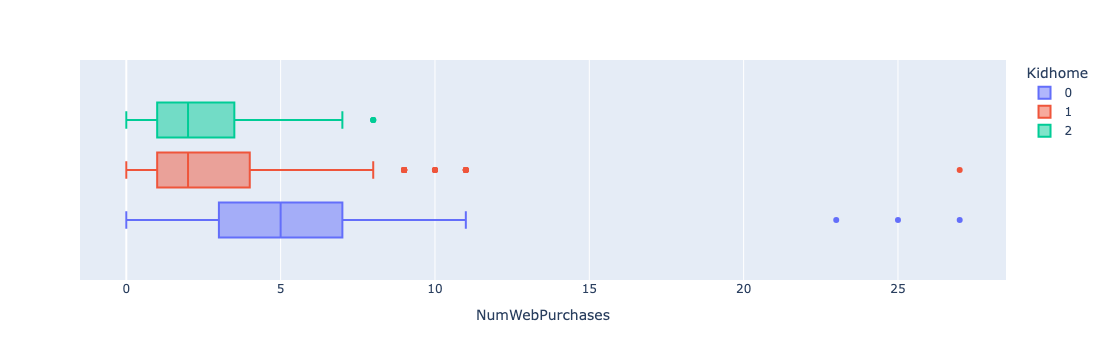

In [46]:
px.box(df, x = 'NumWebPurchases', color = 'Kidhome')

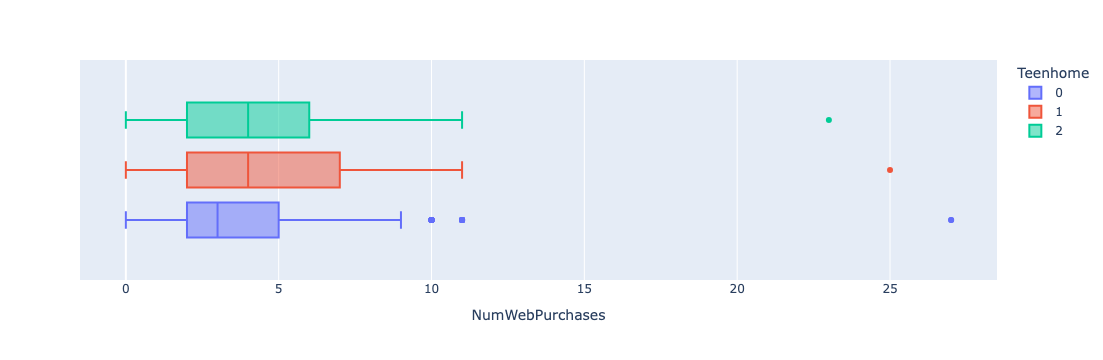

In [47]:
px.box(df, x = 'NumWebPurchases', color = 'Teenhome')

### Do married people purchase more wine?

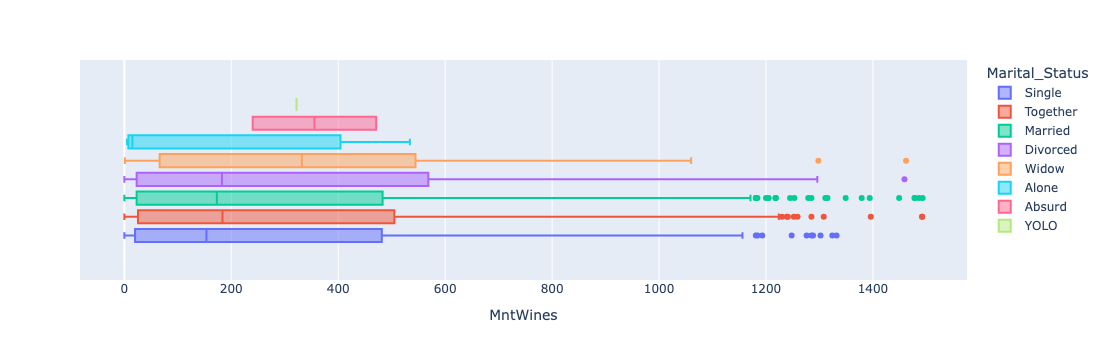

In [48]:
px.box(df, x = 'MntWines', color = 'Marital_Status')

### What kinds of purchases led to customer complaints?

In [49]:
df2 = df[df['Complain']>0][['Complain','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']]
df2.head()

,Complain,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
78,1,1,0,0,3
147,1,1,1,0,2
192,1,1,2,1,2
271,1,3,3,0,4
355,1,2,2,0,3


In [50]:
df3 = df2.groupby('Complain',as_index = False).sum()
df3.head()

,Complain,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,1,49,76,43,110


In [51]:
plt.bar(df3[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']])

TypeError: bar() missing 1 required positional argument: 'height'

<Axes: >

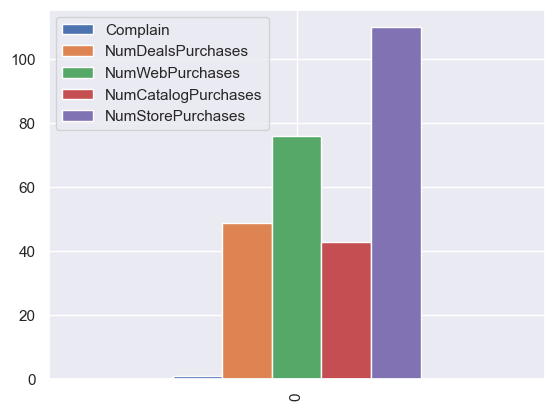

In [52]:
df3.plot(kind = 'bar')

In [53]:
df3.T.iloc[1:]

,0
NumDealsPurchases,49
NumWebPurchases,76
NumCatalogPurchases,43
NumStorePurchases,110


<Axes: >

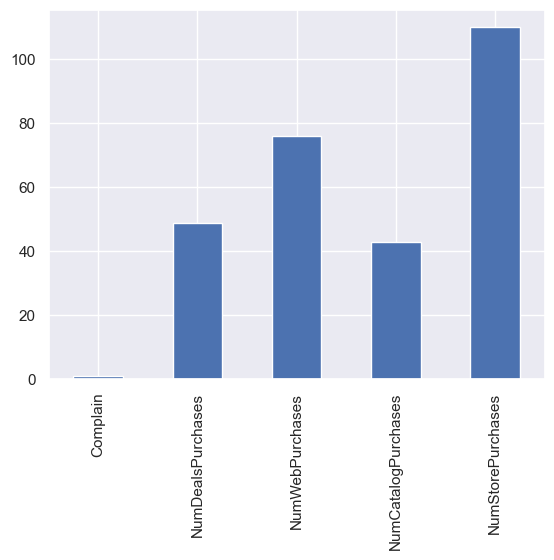

In [54]:
df3.T.plot(kind="bar", legend=False)

<Axes: >

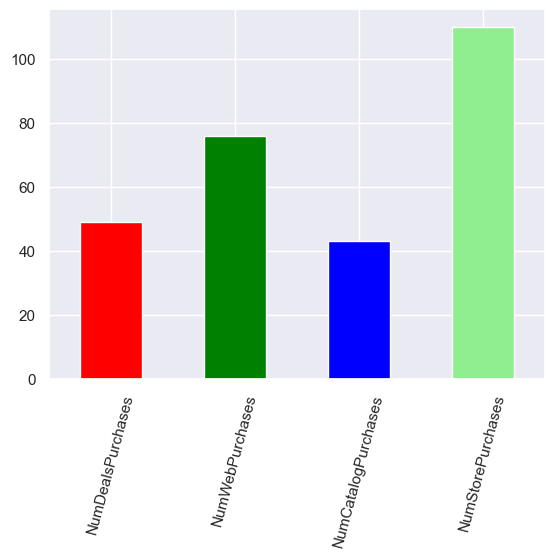

In [55]:
df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases',"Complain"]]\
    .query('Complain > 0')\
    .sum()\
    .iloc[:-1]\
    .plot(kind = "bar", color=["red", "green", "blue", "lightgreen"], rot=75)

In [56]:
type(df3.T)

pandas.core.frame.DataFrame

In [57]:
type(plt)

module

In [58]:
df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases',"Complain"]]\
    .query('Complain > 0')\
    # .sum()\
    # .iloc[:-1]

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain
78,1,0,0,3,1
147,1,1,0,2,1
192,1,2,1,2,1
271,3,3,0,4,1
355,2,2,0,3,1
358,1,5,3,5,1
590,2,2,1,2,1
972,3,3,0,4,1
1041,3,2,0,3,1
1069,1,3,7,13,1
